# Table of Contents
* [Intro](#Intro)
* [Word Count by Sender](#Word-Count-by-Sender)
	* [Top N Words](#Top-N-Words)
		* [Top Words Total](#Top-Words-Total)
		* [Top Words by Sender](#Top-Words-by-Sender)
		* [Top Unbalanced Words](#Top-Unbalanced-Words)
	* [Words Used Just By](#Words-Used-Just-By)
* [Word Count by Month](#Word-Count-by-Month)
	* [Total](#Total)
	* [By Sender](#By-Sender)
* [Word Count by Hour](#Word-Count-by-Hour)
	* [Total](#Total)
	* [By Sender](#By-Sender)
* [Word Trend [WIP]](#Word-Trend-[WIP])
	* [Total](#Total)
	* [Words with highest variability](#Words-with-highest-variability)


# Intro

This notebook explores different words-specific stats together with their visualization.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import sys
sys.path.append(os.path.join(os.getcwd(), "src"))

import util.io as mio
import util.plotting as mplot
from model.conversationDataframe import ConversationDataframe
from stats.wordsCountStats import WordsCountStats
from stats.iConvStats import IConvStats
from util import statsUtil

%matplotlib notebook
sns.set_context("paper")

%load_ext autoreload
%autoreload 2

In [2]:
# filepath to your conversation file. You can use my conversations examples for testing
FILEPATH = "src/resources/unittest/test_plotting.txt"
# load conversation
conv = ConversationDataframe(FILEPATH)
conv.loadMessages()
msgs = conv.messages
msgs.head()

,year,month,day,date,hour,time,datetime,sender,text
0,2014,01,30,2014.01.30,17,17:58:04,2014-01-30 17:58:04,s2,afar prairie overhead under last all master Ha...
1,2014,01,30,2014.01.30,20,20:33:16,2014-01-30 20:33:16,s1,"the them any of of , yellower the"
2,2014,01,30,2014.01.30,21,21:48:49,2014-01-30 21:48:49,s2,", soothing laugher the , had , ' long not of"
3,2014,01,31,2014.01.31,03,03:34:11,2014-01-31 03:34:11,s2,"first thy , cotton , here - , always a , really"
4,2014,01,31,2014.01.31,16,16:39:02,2014-01-31 16:39:02,s1,"young , whole the balls forth south I also"


# Word Count by Sender

Consider ovarall word usage comparisong between senders

In [3]:
# load sender stats
sender_stats = conv.stats.generateStats(IConvStats.STATS_NAME_WORDCOUNT, ngram_range=(1,1))
sender_word_count = sender_stats.wordsCount
sender_word_count.head(3)

,--,--',1,11,17,1865,1876,19,2,25,...,youngest,your,yours,yourself,yourselves,youth,youths,zeus,zones,zuyder
sender,,,,,,,,,,,,,,,,,,,,,
s1,54,1,3,0,1,1,0,1,6,0,...,1,24,2,5,2,4,1,0,1,0
s2,54,0,1,2,0,0,1,0,3,1,...,0,24,1,3,0,1,0,1,0,1


## Top N Words

Most frequent words, overall (total) and sender specific.

### Top Words Total

In [4]:
total_word_count = sender_stats.getWordsCount()
total_word_count.sort_values(ascending=False)[:5]

the    1413
and     693
of      589
i       397
to      307
dtype: int64

### Top Words by Sender

In [5]:
sender_stats.getWordsCount(sender='s1').sort_values(ascending=False)[:5]

the    707
and    358
of     311
i      224
to     150
Name: s1, dtype: int64

### Top Unbalanced Words

Words with higher frequency difference between senders

In [6]:
unbalances_word_count = (sender_word_count.loc['s1']-sender_word_count.loc['s2']).abs()
unbalances_word_count.sort_values(ascending=False)[:5]

i      51
of     33
and    23
as     21
you    19
dtype: int64

## Words Used Just By

In [29]:
sender_stats.getWordsUsedJustBy('s2', 's1').head(5)

sender,s1,s2
perfect,0,8
film,0,5
snow,0,5
northern,0,5
forty,0,4


# Word Count by Month

Consider words usage along time aggregated by months.

In [30]:
# load month stats
month_stats = conv.stats.generateStats(IConvStats.STATS_NAME_WORDCOUNT, groupByColumns=['year', 'month'])
month_word_count = month_stats.wordsCount
month_word_count.head()
#filepath = conv.statsFolder + '\\' + 'wordCount.txt'
#mio.printDataFrameToFile(stats, filepath)

--  --'  1  11  17  1865  1876  19  2  25   ...    \
year month sender                                              ...     
2014 01    s1       0    0  0   0   0     0     0   0  0   0   ...     
           s2       0    0  0   0   0     0     0   0  0   0   ...     
     02    s1       2    0  0   0   1     0     0   0  1   0   ...     
           s2       3    0  0   0   0     0     0   0  0   1   ...     
     03    s1       1    0  0   0   0     0     0   0  0   0   ...     

                   youngest  your  yours  yourself  yourselves  youth  youths  \
year month sender                                                               
2014 01    s1             0     0      0         0           0      0       0   
           s2             0     0      0         0           0      0       0   
     02    s1             0     0      0         0           0      0       0   
           s2             0     1      0         0           0      1       0   
     03    s1             0     0      0         0           0      1       0   

                   zeus  zones  zuyder  
year month sender                       
2014 01    s1         0      0       0  
           s2         0      0       0  
     02    s1         0      0       0  
           s2         0      0       0  
     03    s1         0      0       0  

[5 rows x 4029 columns]

## Total

In [31]:
tot_month_word_count = month_stats.getWordsCount(['17','your','youth'])
tot_month_word_count.head()

17  your  youth
year month                 
2014 01      0     0      0
     02      1     1      1
     03      0     0      1
     04      0     1      0
     05      0     2      0

<IPython.core.display.Javascript object>


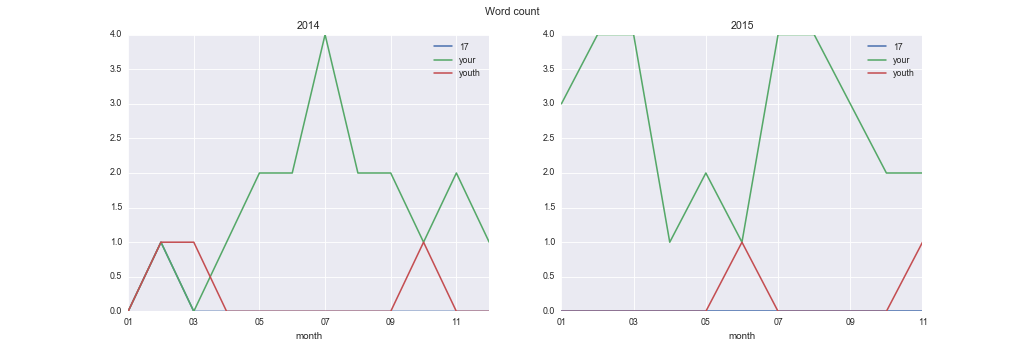

In [32]:
mplot.plotWordsCount(month_stats, ['17','your','youth'])

## By Sender

<IPython.core.display.Javascript object>


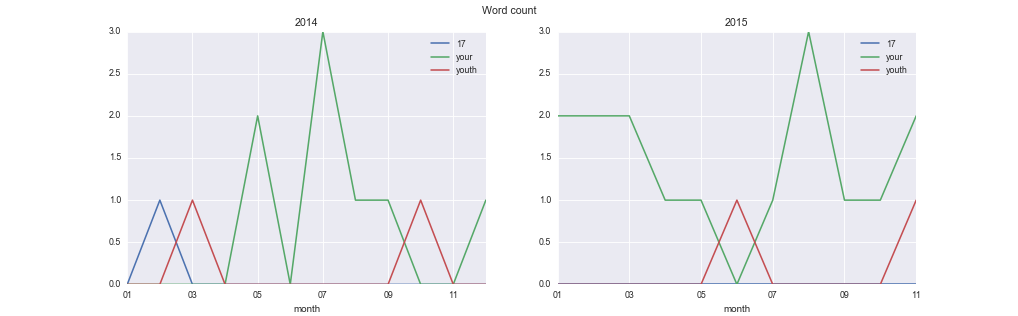

In [33]:
mplot.plotWordsCount(month_stats, ['17','your','youth'], sender='s1')

In [41]:
# get data to plot (target words)
target_words = ['your','youth']
stats_to_plot = statsUtil.transformStats(month_word_count[target_words], 'word', 'val')

<IPython.core.display.Javascript object>


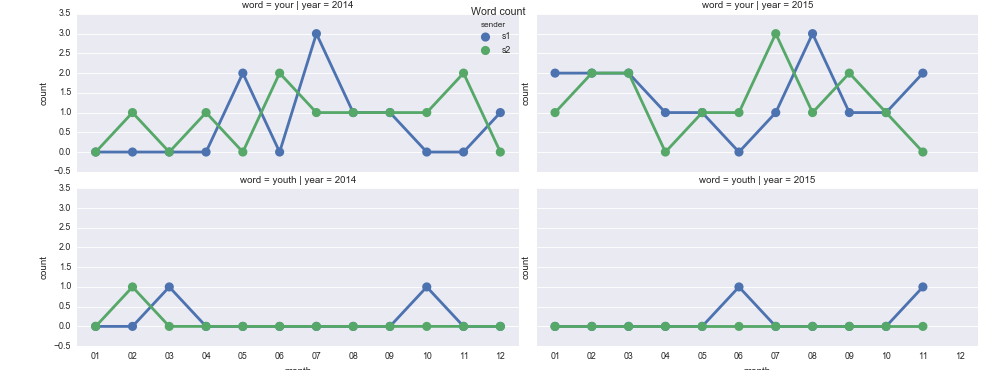

In [42]:
mplot._genericFactorPlot(stats_to_plot, 'month', 'val', {}, "Word count", "count", col='year', row='word')

# Word Count by Hour

Consider words usage along time aggregated by hour.

In [37]:
# load hours stats
hour_stats = conv.stats.generateStats(IConvStats.STATS_NAME_WORDCOUNT, groupByColumns=['hour'])
hour_word_count = hour_stats.wordsCount
hour_word_count.head(3)

--  --'  1  11  17  1865  1876  19  2  25   ...    youngest  \
hour sender                                              ...               
00   s1       1    0  0   0   0     0     0   0  2   0   ...           0   
     s2       1    0  0   0   0     0     0   0  0   0   ...           0   
01   s1       2    0  0   0   0     0     0   0  0   0   ...           0   

             your  yours  yourself  yourselves  youth  youths  zeus  zones  \
hour sender                                                                  
00   s1         1      0         0           0      0       0     0      0   
     s2         0      0         1           0      0       0     0      0   
01   s1         2      1         0           0      0       0     0      0   

             zuyder  
hour sender          
00   s1           0  
     s2           0  
01   s1           0  

[3 rows x 4029 columns]

## Total

<IPython.core.display.Javascript object>


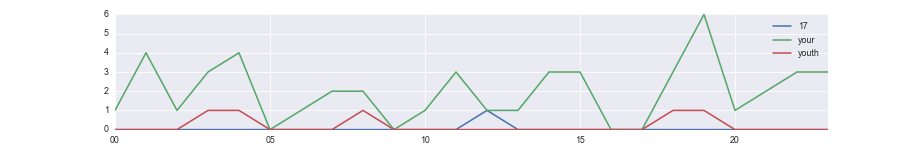

In [38]:
# plot total for target words
mplot.plotWordsCount(hour_stats, ['17','your','youth'])

## By Sender

In [43]:
# get data to plot (target words)
target_words = ['17','your','youth']
stats_to_plot = statsUtil.transformStats(hour_word_count[target_words], 'word', 'val')

<IPython.core.display.Javascript object>


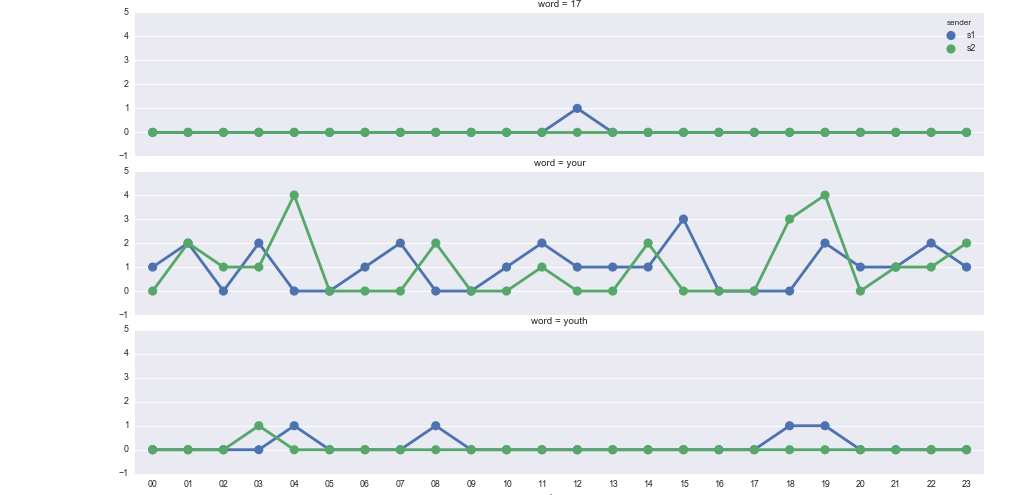

In [44]:
mplot._genericFactorPlot(stats_to_plot, 'hour', 'val', {}, "", "", row='word')

# Word Trend [WIP]

About words usage change along time.

In [46]:
# load month stats
month_stats = conv.stats.generateStats(IConvStats.STATS_NAME_WORDCOUNT, groupByColumns=['year', 'month'])
month_word_count = month_stats.wordsCount

## Total

In [47]:
total_month_word_trend = month_stats._computeWordsTrend(month_word_count)

In [48]:
total_month_word_trend.head()

--  --'  1  11  17  1865  1876  19  2  25   ...    youngest  your  \
year month                                              ...                     
2014 02      5    0  0   0   1     0     0   0  1   1   ...           0     1   
     03     -1    0  0   0  -1     0     0   0 -1  -1   ...           0    -1   
     04      2    0  0   0   0     1     0   0  1   0   ...           0     1   
     05      2    0  0   0   0    -1     0   0 -1   0   ...           0     1   
     06      1    0  0   0   0     0     0   0  0   0   ...           0     0   

            yours  yourself  yourselves  youth  youths  zeus  zones  zuyder  
year month                                                                   
2014 02         0         0           0      1       0     0      0       0  
     03         0         0           0      0       0     0      0       0  
     04         1         1           0     -1       0     0      0       0  
     05         0        -1           0      0       0     0      0       0  
     06        -1         0           0      0       0     0      0       0  

[5 rows x 4029 columns]

In [55]:
change_threshold = 20
total_month_word_trend[(total_month_word_trend>change_threshold)|(total_month_word_trend<(-change_threshold))]\
                .dropna(axis=1, how='all').dropna(axis=0, how='all')

,,and,of,the
year,month,,,
2014,02,26.0,21.0,41.0
2015,11,NaN,NaN,-29.0


## Words with highest variability

In [56]:
total_month_word_trend.apply(lambda x:np.std(x), axis=0).sort_values(ascending=False)[:5]

the    15.650958
of     10.917800
and     9.777800
i       8.181944
to      5.515755
dtype: float64